# 출처

 출처 - [https://kosis.kr/statHtml/statHtml.do?orgId=408&tblId=DT_KAB_11672_S1]

In [ ]:
import numpy as np
import pandas as pd
import copy
import datetime

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import folium

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
from matplotlib import font_manager, rcParams
!apt-get install fonts-nanum*
rcParams['font.family'] = 'NanumGothicCoding'
rcParams['axes.unicode_minus'] = False
font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


# 부동산 소비심리가 거래가격동향지수에 미치는 관련성
- 가설 = 소비심리에 의해서 사람들의 돈의 유동성에 따라 모든 가격과 거래수치가 빠르게 바뀐다.

  출처 = www.reb.or.kr

## 월별 데이터

In [ ]:
price =  pd.read_csv('/content/sample_data/Data(가격지수).csv')

psycho =  pd.read_csv('/content/sample_data/Data(부동산소비심리).csv')

supply  =  pd.read_csv('/content/sample_data/Data(수급동향).csv')

apt =  pd.read_csv('/content/sample_data/Data(실거래가격).csv')

hous =  pd.read_csv('/content/sample_data/Data(주택거래).csv')

seoul = pd.read_csv('/content/sample_data/Data(서울가격).csv')

seoul_m = pd.read_csv('/content/sample_data/Data(서울수급).csv')

## 시각화 할 자료불러오기

In [ ]:
apt_m = copy.deepcopy(apt)  # 아파트매매 실거래 가격
psycho_m = copy.deepcopy(psycho)  # 부동산소비심리
hous_m = copy.deepcopy(hous)  # 주택거래량
price_m = copy.deepcopy(price)  # 아파트가격지수
supply_m = copy.deepcopy(supply)  # 아파트수급동향

In [ ]:
Data = pd.read_csv('/content/sample_data/Data(결합).csv')

In [ ]:
Data_H = copy.deepcopy(Data)

In [ ]:
Data_H.drop(columns=['Unnamed: 0'], inplace=True)

### 상관계수 적용

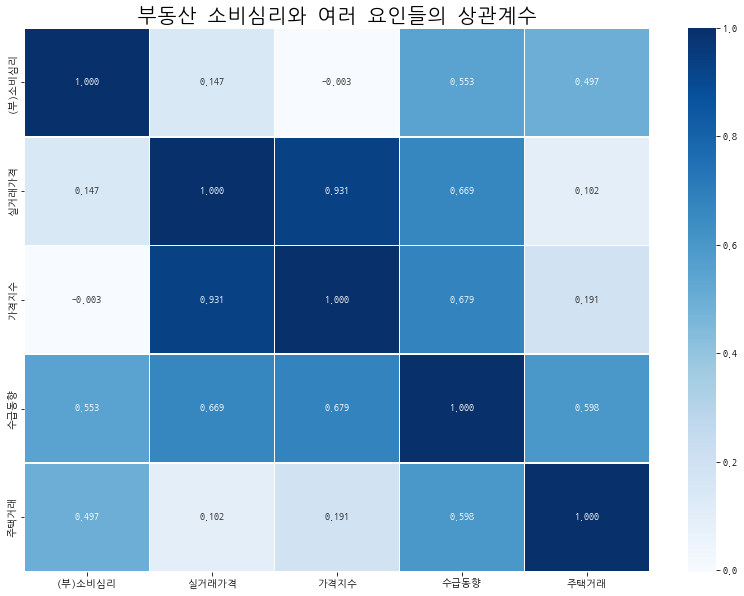

In [ ]:
plt.figure( figsize= (14,10) )
plt.title(' 부동산 소비심리와 여러 요인들의 상관계수 ', fontsize = 20)
sns.heatmap( data =  Data_H.corr(method='pearson'), annot=True, fmt='.3f', linewidths=.5, cmap='Blues')

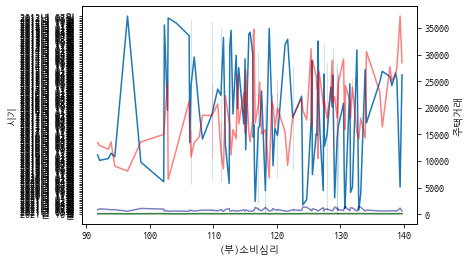

In [ ]:
# 소비심리로 인한 여러가지 요인들의 변동을 그래프로 표현
sns.lineplot( data=Data_H, x='(부)소비심리', y='시기')


ax = plt.gca()
ax2 = ax.twinx()
sns.lineplot( data=Data_H, x='(부)소비심리', y='주택거래', ax=ax2, color='red', alpha=0.5 )
sns.lineplot( data=Data_H, x='(부)소비심리', y='가격지수', ax=ax2, color='black', alpha=0.5 )
sns.lineplot( data=Data_H, x='(부)소비심리', y='수급동향', ax=ax2, color='green', alpha=0.5 )
sns.lineplot( data=Data_H, x='(부)소비심리', y='실거래가격', ax=ax2, color='navy', alpha=0.5 )

### 상관관계 결과

- 소비심리와 실거래가격 (0.147)
- 소비심리와 수급동향 (0.553)
- 소비심리와 가격지수(-0.003)
- 소비심리와 실거래가격(0.147)
- 소비심리와 주택거래(0.497) 

소비심리

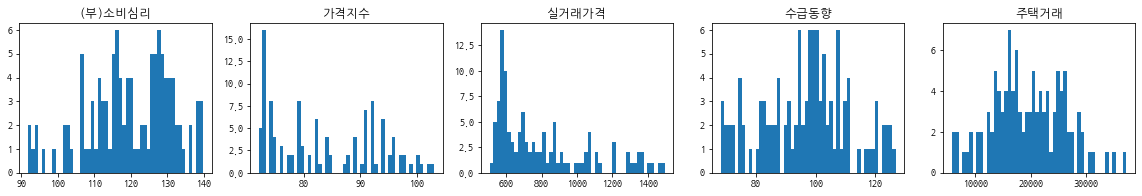

In [ ]:
# 각각의 피처들에 대한 단위가 다르다.
totalStatistics_pichers = Data_H[['(부)소비심리','가격지수','실거래가격','수급동향','주택거래']]
def plot_hist_each_column(df):
  plt.rcParams['figure.figsize'] = [20, 16]
  fig = plt.figure(1)
  # df의 열 개수 만큼의 subplot을 출력
  for i in range(len(df.columns)):
    ax = fig.add_subplot(5, 5, i+1)
    plt.hist(df[df.columns[i]], bins=50)
    ax.set_title(df.columns[i])
  plt.show()

plot_hist_each_column(totalStatistics_pichers)

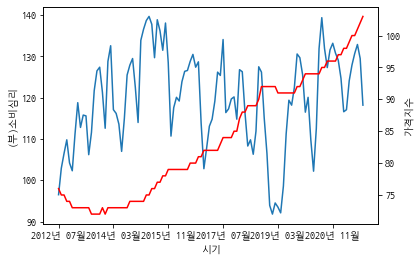

In [ ]:
sns.lineplot( data=Data_H, x='시기', y='(부)소비심리')
ax = plt.gca()

xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%20==0:
        xticks[i].set_visible(True)
    else:
       xticks[i].set_visible(False)

ax2 = ax.twinx()

sns.lineplot( data=Data_H, x='시기', y='가격지수', ax=ax2, color='red')

plt.show()

- 소비심리와 주택거래

주택거래가 많아질 수록 소비심리가 높아졌다.
당연한말이다.
하지만 이전에는 변동이 심하다가 수치 30000 을 넘어서서는 갑자기 급등하는 걸 알 수 있다.

- 실거래가격과 소비심리
실거래가격이 높아질 수록 소비심리가 낮아질 줄 알았는대 수치1200 이후 부터는 0.6 에서 고정된 수치로 0.8 이상 높아지지 않고 있다.

수치 1000 전에는 매우 낮은 소비심리를 보이다가 갑자기 1200에 들어서면서 급등 한 걸 볼 수 있다. 

In [ ]:
seoul.drop(columns=['Unnamed: 0'], inplace=True)
seoul_m.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
seoul

,시기,서울평균,도심권,동북권,서북권,서남권,동남권
0,2013. 01,79.4,82.6,80.9,81.4,80.1,74.7
1,2013. 02,79.2,82.5,80.6,81.3,79.8,74.5
2,2013. 03,79.1,82.4,80.4,81.2,79.7,74.6
3,2013. 04,79.1,82.2,80.4,80.8,80.0,74.8
4,2013. 05,79.3,82.1,80.4,80.8,80.1,75.1
...,...,...,...,...,...,...,...
102,2021. 07,100.6,100.4,100.7,100.5,100.5,100.7
103,2021. 08,101.3,101.0,101.5,101.1,101.1,101.5
104,2021. 09,102.0,101.6,102.1,101.7,101.7,102.7
105,2021. 10,102.7,102.3,102.7,102.4,102.3,103.7


In [ ]:
seoul_m

,시기,서울평균,도심권,동북권,서북권,서남권,동남권
0,2013. 01,72.5,59.9,82.5,59.8,70.1,67.8
1,2013. 02,73.9,59.9,84.6,60.9,70.2,68.6
2,2013. 03,74.6,59.9,84.9,63.0,73.9,68.4
3,2013. 04,75.5,59.9,87.0,62.2,89.8,78.0
4,2013. 05,76.6,59.9,88.5,63.1,89.5,85.0
...,...,...,...,...,...,...,...
102,2021. 07,119.2,112.4,126.4,106.8,118.6,123.9
103,2021. 08,122.5,116.1,128.5,112.9,122.1,125.3
104,2021. 09,119.9,118.9,122.6,114.3,119.9,125.8
105,2021. 10,106.3,107.0,107.7,102.6,111.1,118.3


<Figure size 1440x360 with 0 Axes>

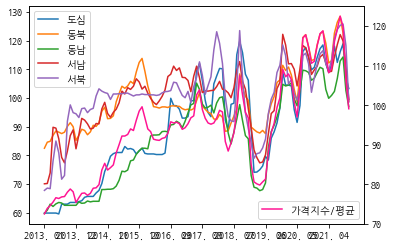

In [ ]:
plt.figure( figsize=(20,5) )
fig, ax1 = plt.subplots()
ax1.plot(seoul_m['시기'],seoul_m['도심권'],label='도심')
ax1.plot(seoul_m['시기'],seoul_m['동북권'],label='동북')
ax1.plot(seoul_m['시기'],seoul_m['서북권'],label='동남')
ax1.plot(seoul_m['시기'],seoul_m['서남권'],label='서남')
ax1.plot(seoul_m['시기'],seoul_m['동남권'],label='서북')
ax1.legend(loc='upper left')


ax2=ax1.twinx()

ax2.plot(seoul_m['시기'],seoul_m['서울평균'],color='deeppink',label="가격지수/평균")
ax2.legend(loc='lower right')
plt.xticks(seoul['시기'],rotation =45)
ax1.locator_params( tight=True,nbins=10)
ax2.locator_params( tight=True,nbins=10)

<Figure size 1440x360 with 0 Axes>

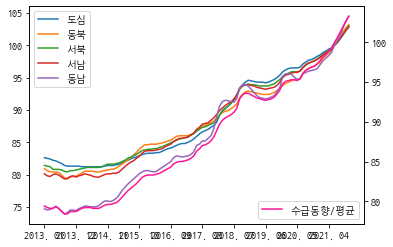

In [ ]:
plt.figure( figsize=(20,5) )
fig, ax1 = plt.subplots()
ax1.plot(seoul['시기'],seoul['도심권'],label='도심')
ax1.plot(seoul['시기'],seoul['동북권'],label='동북')
ax1.plot(seoul['시기'],seoul['서북권'],label='서북')
ax1.plot(seoul['시기'],seoul['서남권'],label='서남')
ax1.plot(seoul['시기'],seoul['동남권'],label='동남')
ax1.legend(loc='upper left')


ax2=ax1.twinx()

ax2.plot(seoul['시기'],seoul['서울평균'],color='deeppink',label="수급동향/평균")
ax2.legend(loc='lower right')
plt.xticks(seoul['시기'],rotation =45)
ax1.locator_params( tight=True,nbins=10)
ax2.locator_params( tight=True,nbins=10)

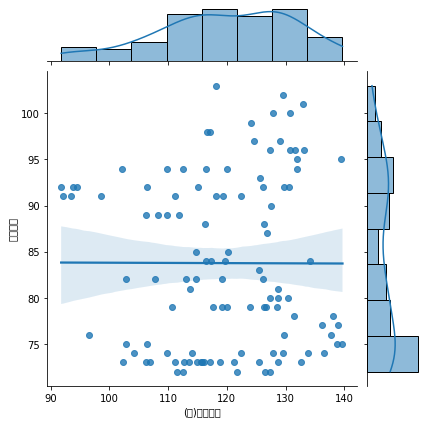

In [ ]:
sns.jointplot(x='(부)소비심리',y='가격지수',kind='reg',data=Data_H)

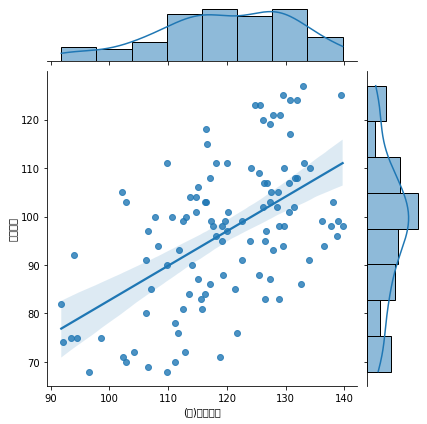

In [ ]:
sns.jointplot(x='(부)소비심리',y='수급동향',kind='reg',data=Data_H)

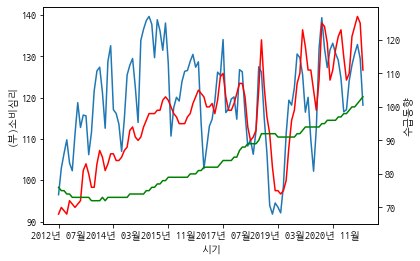

In [ ]:
sns.lineplot( data=Data_H, x='시기', y='(부)소비심리')
ax = plt.gca()

xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%20==0:
        xticks[i].set_visible(True)
    else:
       xticks[i].set_visible(False)

ax2 = ax.twinx()

sns.lineplot( data=Data_H, x='시기', y='수급동향', ax=ax2, color='red')
sns.lineplot( data=Data_H, x='시기', y='가격지수', ax=ax2, color='green')

plt.show()

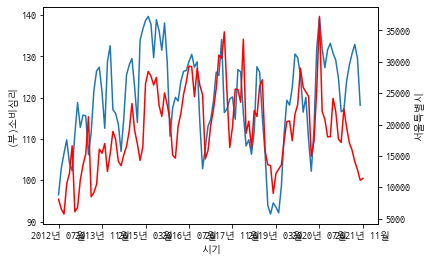

<Figure size 2880x720 with 0 Axes>

In [23]:
sns.lineplot( data=Data_H, x='시기', y='(부)소비심리')
ax = plt.gca()
plt.figure(figsize=(40,10))
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%16==0:
        xticks[i].set_visible(True)
    else:
       xticks[i].set_visible(False)

ax2 = ax.twinx()

sns.lineplot( data=raw, x='시기', y='서울특별시', ax=ax2, color='red')

plt.show()

- 수급동향과 소비심리
  - 수급동향이 늘어날 수록 소비심리가 높아졌다.
  - 확실하게 매매수급이 늘어남에 따라 소비심리도 크게 바뀐것 같다
- 가격지수와 소비심리
  - 가격지수와 수급동향과 비교한 값과 비슷한 그래프를 이어나가는 것을 알 수 있다.
  - 확실이 수급동향이 소비심리에 많은 영양을 미친다는 걸 알 수 있다.
  - 가격지수와 소비심리는 계속해서 높은 값을 보여주는 것 같다.
  - 심리지수와 시장 기본요인들이 매매가격지수에 영향을 주는 것 같다.
  - 가격지수가 확실하게 소비심리에 요인이 되는 것 같다 변동률이 이전과는 다르게 확실하게 큰 폭으로 변동하는 걸 볼 수 있다

# 소비심리지수 주택거래

In [ ]:
# 데이터 불러오기
raw = pd.read_csv('/content/sample_data/주택거래.csv')
raw.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
raw

,시기,서울특별시,서울특별시 종로구,서울특별시 중구,서울특별시 용산구,서울특별시 성동구,서울특별시 광진구,서울특별시 동대문구,서울특별시 중랑구,서울특별시 성북구,서울특별시 강북구,서울특별시 도봉구,서울특별시 노원구,서울특별시 은평구,서울특별시 서대문구,서울특별시 마포구,서울특별시 양천구,서울특별시 강서구,서울특별시 구로구,서울특별시 금천구,서울특별시 영등포구,서울특별시 동작구,서울특별시 관악구,서울특별시 서초구,서울특별시 강남구,서울특별시 송파구,서울특별시 강동구,(부)소비심리
0,2012년 07월,8086,145,111,159,205,270,299,351,372,336,338,453,499,238,368,357,564,405,237,352,290,335,299,322,459,322,96.5
1,2012년 08월,6547,130,123,111,175,224,161,239,313,245,308,360,449,217,304,271,452,270,177,237,334,267,206,334,371,269,102.9
2,2012년 09월,5728,83,72,94,153,150,231,235,268,213,247,330,384,242,248,266,363,251,159,192,316,239,211,258,318,205,106.5
3,2012년 10월,10548,179,102,188,237,258,439,452,490,348,473,572,682,393,313,508,646,432,237,333,479,364,334,1035,643,411,109.8
4,2012년 11월,12194,232,145,157,247,307,361,546,413,429,589,744,697,462,529,491,728,481,284,417,661,560,474,965,796,479,104.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2021년 06월,17117,209,165,416,259,555,514,757,725,631,846,635,1379,517,883,643,1097,810,371,463,668,698,546,1021,1391,918,127.9
108,2021년 07월,15921,229,369,407,281,410,438,606,638,585,621,624,1486,402,652,520,1138,805,379,514,562,698,603,1044,1464,446,130.7
109,2021년 08월,14101,187,214,426,262,417,434,461,708,522,571,533,967,421,619,507,866,694,528,425,582,549,1148,818,801,441,132.9
110,2021년 09월,12808,209,139,379,248,384,338,564,764,458,384,454,888,389,541,472,757,721,357,641,407,513,692,703,650,756,129.5


In [31]:
import matplotlib.pyplot as plt

<Figure size 28800x14400 with 0 Axes>

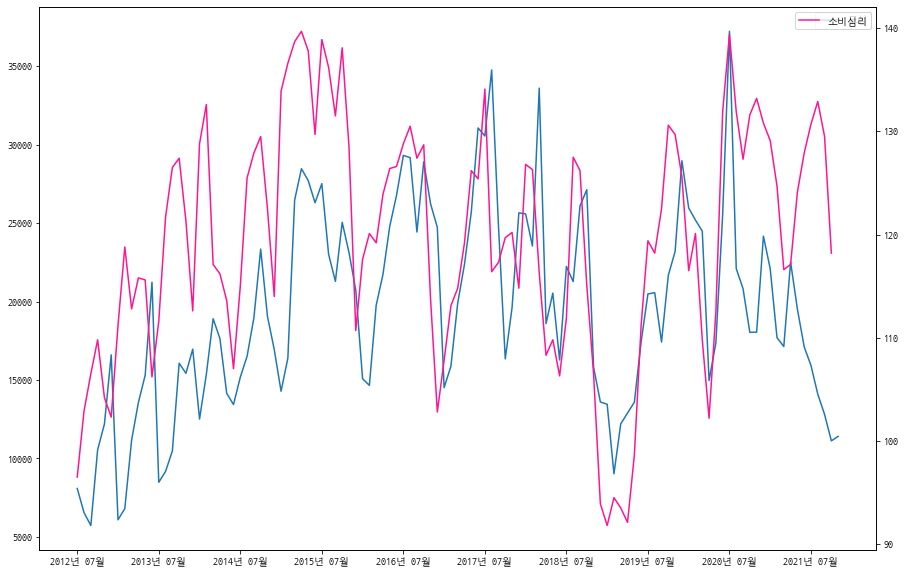

In [37]:
plt.figure( figsize=(400,200) )
fig, ax1 = plt.subplots()
ax1.plot(raw['시기'],raw['서울특별시'],label='도심')
ax1.legend(loc='up left')


ax2=ax1.twinx()
plt.rcParams['figure.figsize'] = [20, 10]
ax2.plot(raw['시기'],raw['(부)소비심리'],color='deeppink',label="소비심리")
ax2.legend(loc='low right')
plt.xticks(raw['시기'],rotation =30)
ax1.locator_params( tight=True,nbins=10)
ax2.locator_params( tight=True,nbins=10)

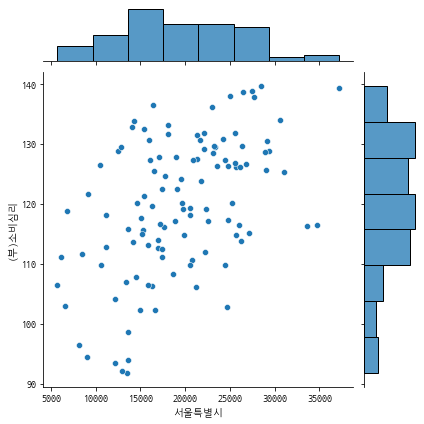

In [ ]:
sns.jointplot(x='서울특별시',y='(부)소비심리',data=raw)
plt.show()

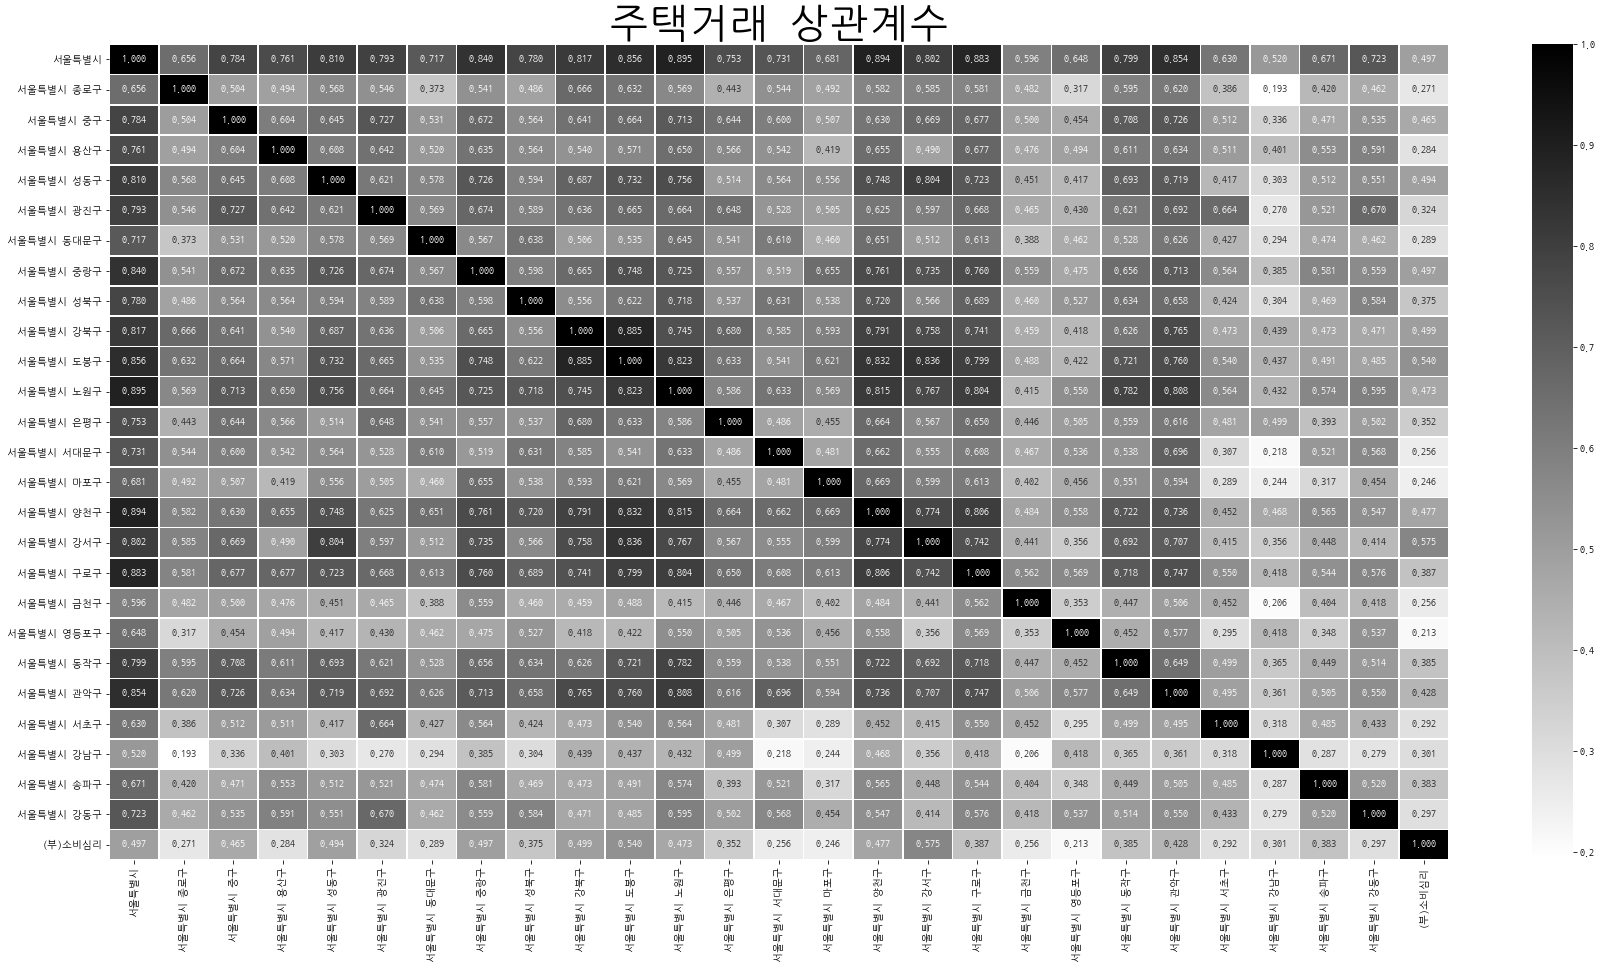

In [ ]:
plt.figure( figsize= (30,15) )
plt.title(' 주택거래 상관계수 ', fontsize = 40)
sns.heatmap( data = raw.corr(method='pearson'), annot=True, fmt='.3f', linewidths=.5, cmap='binary')

- 주택거래와 소비심리지수는 꽤 약한 상관관계를 가지고 있다. 평균(0.3)
- 당연한 말이겠지만 서울특별시의 거래량이 많아질수록 소비심리가 높아지는걸 알 수 있었다.


### 소비심리가 아파트 실거래에 미치는 영향